## Building CNN using Keras
#### MNIST Fashion Datset

In [26]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow
from matplotlib import pyplot as plt
plt.style.use('seaborn')

### Dataset Preparation

In [27]:
X = pd.read_csv('Dataset/fashion-mnist.csv')
X_ = np.array(X)
X = X_[:,1:]
X = X / 255.0
Y = X_[:,0]
print(X.shape,Y.shape)

(10000, 784) (10000,)


In [28]:
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(Y)
print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


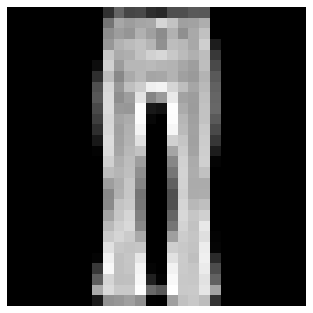

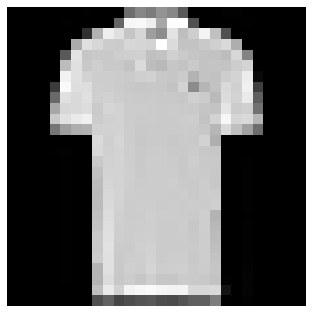

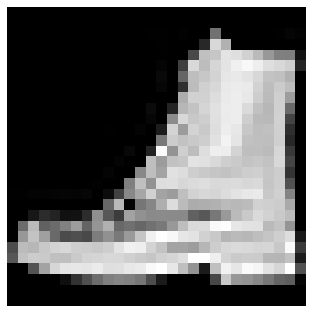

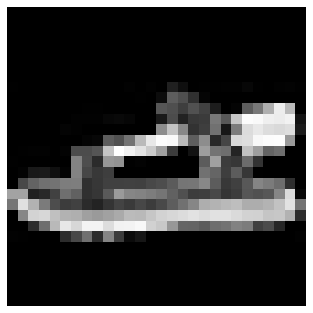

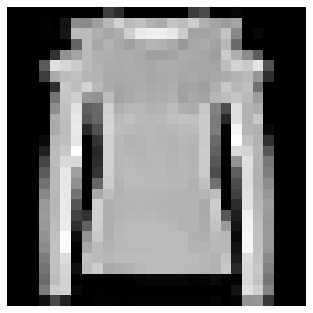

In [37]:
for i in range(65,70):
    plt.imshow(X_train[i].reshape((28,28)),cmap='gray')
    plt.axis('off')
    plt.show()

### Modelling CNN

In [40]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [44]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.2)


Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 22s 3ms/step - loss: 1.6574 - accuracy: 0.4230 - val_loss: 0.9694 - val_accuracy: 0.6600
Epoch 2/20
8000/8000 [==============================] - 18s 2ms/step - loss: 0.8211 - accuracy: 0.7006 - val_loss: 0.7288 - val_accuracy: 0.7305
Epoch 3/20
8000/8000 [==============================] - 20s 3ms/step - loss: 0.6844 - accuracy: 0.7460 - val_loss: 0.6675 - val_accuracy: 0.7450
Epoch 4/20
8000/8000 [==============================] - 18s 2ms/step - loss: 0.6036 - accuracy: 0.7729 - val_loss: 0.5967 - val_accuracy: 0.7750
Epoch 5/20
8000/8000 [==============================] - 18s 2ms/step - loss: 0.5640 - accuracy: 0.7915 - val_loss: 0.5743 - val_accuracy: 0.7885
Epoch 6/20
8000/8000 [==============================] - 20s 2ms/step - loss: 0.5296 - accuracy: 0.8089 - val_loss: 0.5312 - val_accuracy: 0.8140
Epoch 7/20
8000/8000 [==============================] - 20s 3ms/step - loss: 0.48

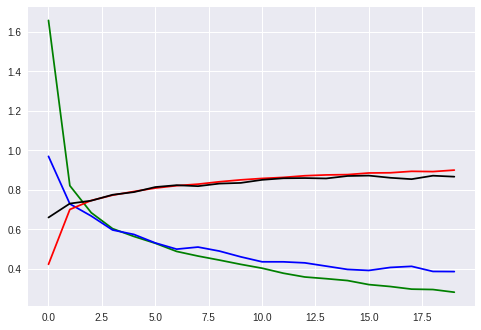

In [56]:
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()